## Machine Learning
## Multiple Linear Regression 
## Baseball - Algorithms for Regression

url: https://scikit-learn.org/stable/index.html

### Moneyball dataset

url: https://en.wikipedia.org/wiki/Moneyball_(film)

url: https://zh.wikipedia.org/wiki/点球成金

url: https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012 

### Crash Courses
url: https://machinelearningmastery.com

url: https://www.kdnuggets.com

url: https://developers.google.com/machine-learning/crash-course

### Moneyball Features (特徵)

Variable Name Description

Team - Name of the baseball team

League - Name of the league

Year - Year

RS - Runs scored

RA - Runs allowed

W - Number of wins

OBP - On-base percentage

SLG - Sluggish percentage

BA - Batting average

Playoffs - Whether team made it to the playoffs or not

RankSeason - Rank of team in the season

RankPlayoffs - Rank of team in the playoffs

G - Games played

OOBP - Opponents On-base percentage

OSLG - Opponents Sluggish percentage

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [3]:
df = pd.read_csv("baseball.csv")

In [4]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [5]:
df.tail()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN
1231,WSA,AL,1962,599,716,60,0.308,0.373,0.250,0,NaN,NaN,162,NaN,NaN


In [6]:
df.columns

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')

In [7]:
df = df[['League', 'RS', 'RA', 'OBP', 'SLG', 'BA', 'Playoffs', 'W']]

In [8]:
df['League'].unique()

array(['NL', 'AL'], dtype=object)

In [9]:
# create dummy variable for League NL, AL 
# and drop one to avoid collinearity 共線性

df = pd.get_dummies(df, prefix = ['League'], drop_first = True)

In [10]:
df.columns

Index(['RS', 'RA', 'OBP', 'SLG', 'BA', 'Playoffs', 'W', 'League_NL'], dtype='object')

In [11]:
df = df[['RS', 'RA', 'OBP', 'SLG', 'BA', 'League_NL', 'Playoffs', 'W']]

In [12]:
df.shape

(1232, 8)

In [13]:
# League: 1 for NL; 0 for AL

df.head()

,RS,RA,OBP,SLG,BA,League_NL,Playoffs,W
0,734,688,0.328,0.418,0.259,1,0,81
1,700,600,0.320,0.389,0.247,1,1,94
2,712,705,0.311,0.417,0.247,0,1,93
3,734,806,0.315,0.415,0.260,0,0,69
4,613,759,0.302,0.378,0.240,1,0,61


In [14]:
df.tail()

,RS,RA,OBP,SLG,BA,League_NL,Playoffs,W
1227,705,759,0.330,0.390,0.260,1,0,81
1228,706,626,0.321,0.394,0.268,1,0,93
1229,878,690,0.341,0.441,0.278,1,1,103
1230,774,664,0.335,0.394,0.271,1,0,84
1231,599,716,0.308,0.373,0.250,0,0,60


## excluding outliers

In [15]:
X = df.iloc[:, : -1]

y = df.iloc[:, -1]

model = LinearRegression()

model.fit(X, y)

yHat = model.predict(X)

data = {'y': y, 'yHat': yHat}

Residual = pd.DataFrame(data)

residual = y - yHat

Residual['residual'] = residual

Residual['residual by %'] = (residual / y) * 100

Residual[50:70]

,y,yHat,residual,residual by %
50,102,101.492045,0.507955,0.497995
51,72,70.469642,1.530358,2.125497
52,71,78.594220,-7.594220,-10.696085
53,67,68.543705,-1.543705,-2.304037
54,86,79.974317,6.025683,7.006608
55,90,90.595117,-0.595117,-0.661242
56,91,92.762186,-1.762186,-1.936468
57,96,100.565703,-4.565703,-4.755941
58,81,78.217946,2.782054,3.434634
59,80,78.765111,1.234889,1.543612


<AxesSubplot:xlabel='residual by %'>

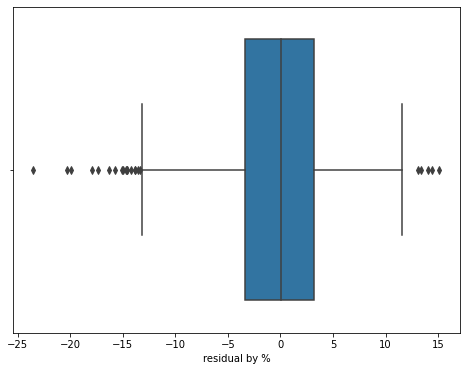

In [16]:
plt.figure(figsize = (8, 6))

sb.boxplot(x = Residual['residual by %'])

In [17]:
q1, q2, q3 = np.percentile(Residual['residual by %'], [25, 50, 75])

print(q1, q2, q3)
print()

iqr = q3 - q1

print(iqr)
print()

lower_bound = q1 - (1.5 * iqr) 

upper_bound = q3 + (1.5 * iqr) 

print(lower_bound, upper_bound)

-3.3431665003446414 0.03975478274770117 3.2301994783967607

6.573365978741402

-13.203215468456744 13.090248446508864


In [18]:
lower_bound1 = q1 - (1.5 * iqr) 

upper_bound1 = q3 + (1.5 * iqr) 

In [19]:
Residual[Residual['residual by %'] >= upper_bound]

,y,yHat,residual,residual by %
210,77,65.360971,11.639029,15.115623
247,76,65.063291,10.936709,14.390407
433,72,61.920315,10.079685,13.999563
757,90,77.969565,12.030435,13.367150
992,60,52.131060,7.868940,13.114900


In [20]:
ub_index = Residual[Residual['residual by %'] >= upper_bound].index

ub_index

Int64Index([210, 247, 433, 757, 992], dtype='int64')

In [21]:
Residual[Residual['residual by %'] <= lower_bound]

,y,yHat,residual,residual by %
187,78,88.784717,-10.784717,-13.826561
403,64,73.403811,-9.403811,-14.693455
523,59,72.867933,-13.867933,-23.504971
528,61,70.925030,-9.925030,-16.270541
545,63,72.188833,-9.188833,-14.585450
638,54,62.068499,-8.068499,-14.941664
709,64,76.784339,-12.784339,-19.975530
735,57,66.895610,-9.895610,-17.360720
761,75,85.018226,-10.018226,-13.357634
800,61,69.465118,-8.465118,-13.877242


In [22]:
lb_index = Residual[Residual['residual by %'] <= lower_bound].index

lb_index

Int64Index([ 187,  403,  523,  528,  545,  638,  709,  735,  761,  800,  913,
             957, 1081, 1113, 1146, 1225, 1231],
           dtype='int64')

In [23]:
df_out1 = df.drop(ub_index, axis = 0)

print(len(df_out1))

1227


In [24]:
df_out2 = df_out1.drop(lb_index, axis = 0)

print(len(df_out2))

1210


In [25]:
print(len(df))
print()
print(len(df) - len(df_out2))

1232

22


### train-test-split at random_state = 2021

In [26]:
# features, independent variable

X = df_out2.iloc[:, : -1]

# labels, dependent variable 

y = df_out2.iloc[:, -1]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021) 

In [28]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

## sklearn Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

yHat_train1 = lr_model.predict(X_train)

yHat_test1 = lr_model.predict(X_test)

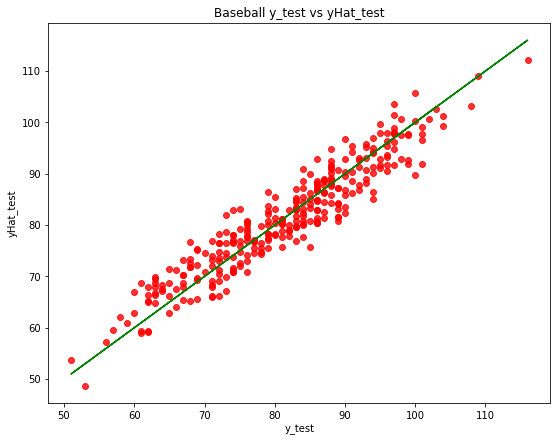

Correlation Coefficient: 
 [[1.         0.94491013]
 [0.94491013 1.        ]]


In [30]:
plt.figure(figsize = (9, 7))

plt.scatter(y_test, yHat_test1, color = "r", alpha = 0.8)

plt.plot(y_test, y_test, "-", color = "g")

plt.title("Baseball y_test vs yHat_test")
plt.xlabel("y_test")
plt.ylabel("yHat_test")
plt.show()

print("Correlation Coefficient: \n", np.corrcoef(y_test, yHat_test1))

y_test_Corr1 = np.corrcoef(y_test, yHat_test1)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [31]:
from sklearn import metrics

MAE1 = round(metrics.mean_absolute_error(y_test, yHat_test1), 2)

MSE1 = round(metrics.mean_squared_error(y_test, yHat_test1), 2)

RMSE1 = round(np.sqrt(metrics.mean_squared_error(y_test, yHat_test1)), 2)

print("MAE1:", MAE1)
print()
print("MSE1:", MSE1)
print()
print("RMSE1:", RMSE1)

MAE1: 3.11

MSE1: 14.29

RMSE1: 3.78


## sklearn Lasso Regularization

url: https://scikit-learn.org/stable/modules/linear_model.html#lasso

url: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train)

yHat_train2 = lasso.predict(X_train)

yHat_test2 = lasso.predict(X_test)

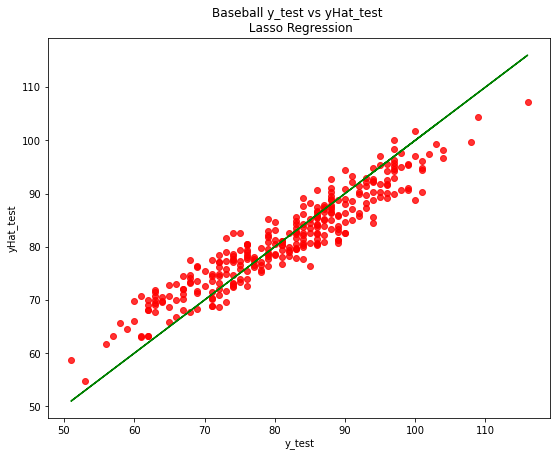

Correlation Coefficient: 
 [[1.         0.94489739]
 [0.94489739 1.        ]]


In [33]:
plt.figure(figsize = (9, 7))

plt.scatter(y_test, yHat_test2, color = "r", alpha = 0.8)

plt.plot(y_test, y_test, "-", color = "g")

plt.title("Baseball y_test vs yHat_test \n Lasso Regression")
plt.xlabel("y_test")
plt.ylabel("yHat_test")
plt.show()

print("Correlation Coefficient: \n", np.corrcoef(y_test, yHat_test2))

y_test_Corr2 = np.corrcoef(y_test, yHat_test2)

In [34]:
MAE2 = round(metrics.mean_absolute_error(y_test, yHat_test2), 2)

MSE2 = round(metrics.mean_squared_error(y_test, yHat_test2), 2)

RMSE2 = round(np.sqrt(metrics.mean_squared_error(y_test, yHat_test2)), 2)

print("MAE2:", MAE2)
print()
print("MSE2:", MSE2)
print()
print("RMSE2:", RMSE2)

MAE2: 3.44

MSE2: 18.19

RMSE2: 4.27


## Ridge Regularization

url: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

url: https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

url: https://machinelearningmastery.com/ridge-regression-with-python/

In [35]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train, y_train)

yHat_train3 = ridge.predict(X_train)

yHat_test3 = ridge.predict(X_test)

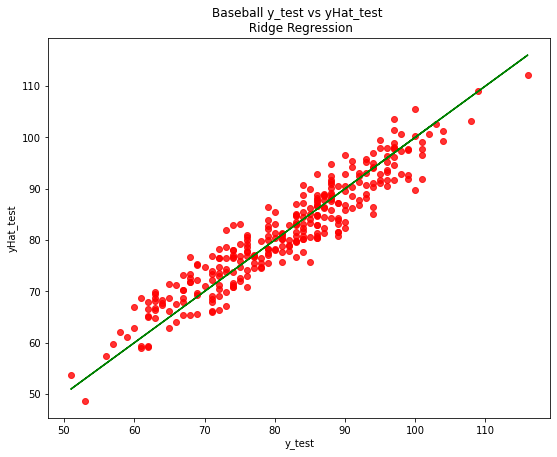

Correlation Coefficient: 
 [[1.         0.94494936]
 [0.94494936 1.        ]]


In [36]:
plt.figure(figsize = (9, 7))

plt.scatter(y_test, yHat_test3, color = "r", alpha = 0.8)

plt.plot(y_test, y_test, "-", color = "g")

plt.title("Baseball y_test vs yHat_test \n Ridge Regression")
plt.xlabel("y_test")
plt.ylabel("yHat_test")
plt.show()

print("Correlation Coefficient: \n", np.corrcoef(y_test, yHat_test3))

y_test_Corr3 = np.corrcoef(y_test, yHat_test3)

In [37]:
MAE3 = round(metrics.mean_absolute_error(y_test, yHat_test3), 2)

MSE3 = round(metrics.mean_squared_error(y_test, yHat_test3), 2)

RMSE3 = round(np.sqrt(metrics.mean_squared_error(y_test, yHat_test3)), 2)

print("MAE3:", MAE3)
print()
print("MSE3:", MSE3)
print()
print("RMSE3:", RMSE3)

MAE3: 3.11

MSE3: 14.28

RMSE3: 3.78


## Decision Tree Regression
### url: https://gdcoder.com/decision-tree-regressor-explained-in-depth/

In [38]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 5, random_state = 2020)

dt.fit(X_train, y_train)

yHat_train4 = dt.predict(X_train)

yHat_test4 = dt.predict(X_test)

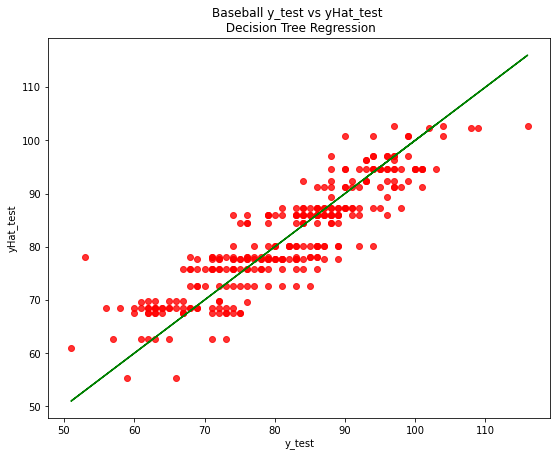

Correlation Coefficient: 
 [[1.         0.88746025]
 [0.88746025 1.        ]]


In [39]:
plt.figure(figsize = (9, 7))

plt.scatter(y_test, yHat_test4, color = "r", alpha = 0.8)

plt.plot(y_test, y_test, "-", color = "g")

plt.title("Baseball y_test vs yHat_test \n Decision Tree Regression")
plt.xlabel("y_test")
plt.ylabel("yHat_test")
plt.show()

print("Correlation Coefficient: \n", np.corrcoef(y_test, yHat_test4))

y_test_Corr4 = np.corrcoef(y_test, yHat_test4)

In [40]:
MAE4 = round(metrics.mean_absolute_error(y_test, yHat_test4), 2)

MSE4 = round(metrics.mean_squared_error(y_test, yHat_test4), 2)

RMSE4 = round(np.sqrt(metrics.mean_squared_error(y_test, yHat_test4)), 2)

print("MAE4:", MAE4)
print()
print("MSE4:", MSE4)
print()
print("RMSE4:", RMSE4)

MAE4: 4.19

MSE4: 28.31

RMSE4: 5.32


## Random Forest Regression

url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

url: https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb

In [41]:
from sklearn.ensemble import RandomForestRegressor  

rf = RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state = 2021) 

rf.fit(X_train, y_train)

yHat_train5 = rf.predict(X_train)

yHat_test5 = rf.predict(X_test)

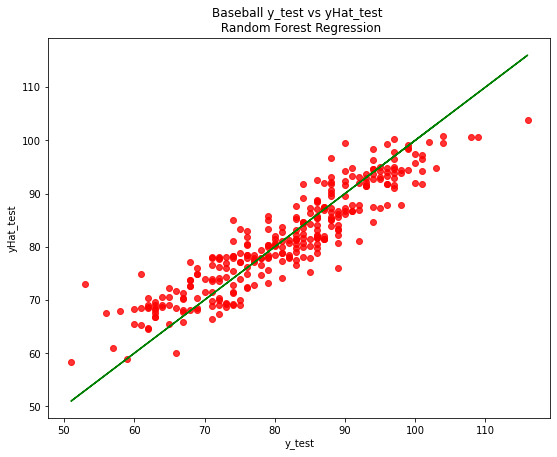

Correlation Coefficient: 
 [[1.         0.91918656]
 [0.91918656 1.        ]]


In [42]:
plt.figure(figsize = (9, 7))

plt.scatter(y_test, yHat_test5, color = "r", alpha = 0.8)

plt.plot(y_test, y_test, "-", color = "g")

plt.title("Baseball y_test vs yHat_test \n Random Forest Regression")
plt.xlabel("y_test")
plt.ylabel("yHat_test")
plt.show()

print("Correlation Coefficient: \n", np.corrcoef(y_test, yHat_test5))

y_test_Corr5 = np.corrcoef(y_test, yHat_test5)

In [43]:
MAE5 = round(metrics.mean_absolute_error(y_test, yHat_test5), 2)

MSE5 = round(metrics.mean_squared_error(y_test, yHat_test5), 2)

RMSE5 = round(np.sqrt(metrics.mean_squared_error(y_test, yHat_test5)), 2)

print("MAE5:", MAE5)
print()
print("MSE5:", MSE5)
print()
print("RMSE5:", RMSE5)

MAE5: 3.72

MSE5: 21.81

RMSE5: 4.67


## Support Vector Regression

url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

url: https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2

In [44]:
from sklearn.svm import SVR  

svr = SVR(gamma = "auto", kernel = "linear", C = 1000) 

svr.fit(X_train, y_train)

yHat_train6 = svr.predict(X_train)

yHat_test6 = svr.predict(X_test)

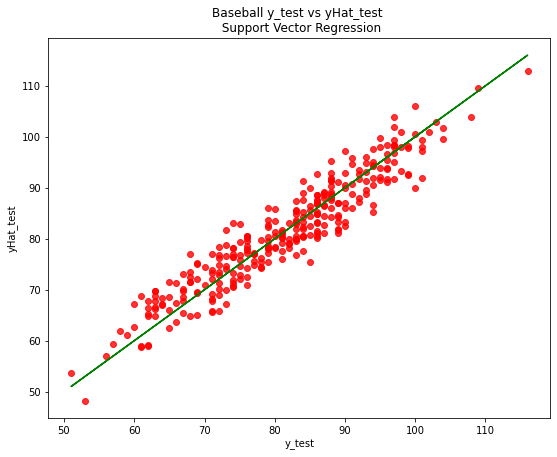

Correlation Coefficient: 
 [[1.         0.94524159]
 [0.94524159 1.        ]]


In [45]:
plt.figure(figsize = (9, 7))

plt.scatter(y_test, yHat_test6, color = "r", alpha = 0.8)

plt.plot(y_test, y_test, "-", color = "g")

plt.title("Baseball y_test vs yHat_test \n Support Vector Regression")
plt.xlabel("y_test")
plt.ylabel("yHat_test")
plt.show()

print("Correlation Coefficient: \n", np.corrcoef(y_test, yHat_test6))

y_test_Corr6 = np.corrcoef(y_test, yHat_test6)

In [46]:
MAE6 = round(metrics.mean_absolute_error(y_test, yHat_test6), 2)

MSE6 = round(metrics.mean_squared_error(y_test, yHat_test6), 2)

RMSE6 = round(np.sqrt(metrics.mean_squared_error(y_test, yHat_test6)), 2)

print("MAE6:", MAE6)
print()
print("MSE6:", MSE6)
print()
print("RMSE6:", RMSE6)

MAE6: 3.09

MSE6: 14.17

RMSE6: 3.76


## Multivariate Adaptive Regression Splines using PyEarth

url: https://machinelearningmastery.com/multivariate-adaptive-regression-splines-mars-in-python/

url: https://github.com/scikit-learn-contrib/py-earth

In [47]:
from pyearth import Earth

ear = Earth()

ear.fit(X_train, y_train)

yHat_train7 = ear.predict(X_train)

yHat_test7 = ear.predict(X_test)

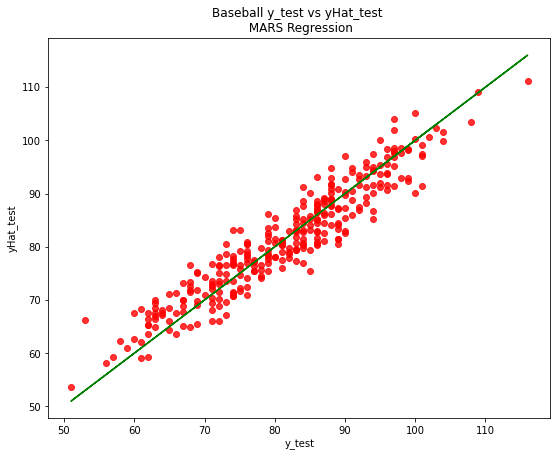

Correlation Coefficient: 
 [[1.         0.94397735]
 [0.94397735 1.        ]]


In [48]:
plt.figure(figsize = (9, 7))

plt.scatter(y_test, yHat_test7, color = "r", alpha = 0.8)

plt.plot(y_test, y_test, "-", color = "g")

plt.title("Baseball y_test vs yHat_test \n MARS Regression")
plt.xlabel("y_test")
plt.ylabel("yHat_test")
plt.show()

print("Correlation Coefficient: \n", np.corrcoef(y_test, yHat_test7))

y_test_Corr7 = np.corrcoef(y_test, yHat_test7)

In [49]:
MAE7 = round(metrics.mean_absolute_error(y_test, yHat_test7), 2)

MSE7 = round(metrics.mean_squared_error(y_test, yHat_test7), 2)

RMSE7 = round(np.sqrt(metrics.mean_squared_error(y_test, yHat_test7)), 2)

print("MAE7:", MAE7)
print()
print("MSE7:", MSE7)
print()
print("RMSE7:", RMSE7)

MAE7: 3.09

MSE7: 14.64

RMSE7: 3.83


### Extreme Gradient Boosting (XGBoost) 

url: https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/

### sudo pip install xgboost

### brew install libomp

In [50]:
import xgboost

print(xgboost.__version__)

1.2.1


In [51]:
from xgboost import XGBRegressor

xgb = XGBRegressor() 

xgb.fit(X_train, y_train)

yHat_test8 = xgb.predict(X_test)

yHat_train8 = xgb.predict(X_train)

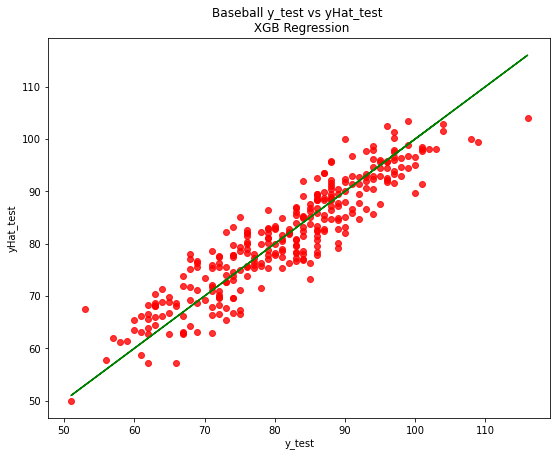

Correlation Coefficient: 
 [[1.         0.92026078]
 [0.92026078 1.        ]]


In [52]:
plt.figure(figsize = (9, 7))

plt.scatter(y_test, yHat_test8, color = "r", alpha = 0.8)

plt.plot(y_test, y_test, "-", color = "g")

plt.title("Baseball y_test vs yHat_test \n XGB Regression")
plt.xlabel("y_test")
plt.ylabel("yHat_test")
plt.show()

print("Correlation Coefficient: \n", np.corrcoef(y_test, yHat_test8))

y_test_Corr8 = np.corrcoef(y_test, yHat_test8)

In [53]:
MAE8 = round(metrics.mean_absolute_error(y_test, yHat_test8), 2)

MSE8 = round(metrics.mean_squared_error(y_test, yHat_test8), 2)

RMSE8 = round(np.sqrt(metrics.mean_squared_error(y_test, yHat_test8)), 2)

print("MAE8:", MAE8)
print()
print("MSE8:", MSE8)
print()
print("RMSE8:", RMSE8)

MAE8: 3.64

MSE8: 20.35

RMSE8: 4.51


### sklearn - Elastic Net

url: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

url: https://machinelearningmastery.com/elastic-net-regression-in-python/

In [55]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha = 1.0, l1_ratio = 0.5)

en.fit(X_train, y_train)

yHat_train9 = en.predict(X_train)

yHat_test9 = en.predict(X_test)

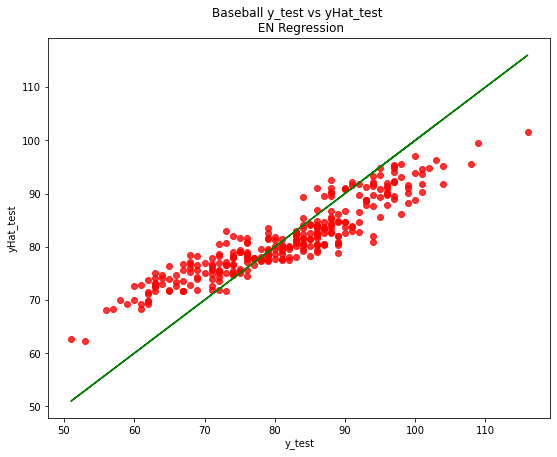

Correlation Coefficient: 
 [[1.         0.92234119]
 [0.92234119 1.        ]]


In [56]:
plt.figure(figsize = (9, 7))

plt.scatter(y_test, yHat_test9, color = "r", alpha = 0.8)

plt.plot(y_test, y_test, "-", color = "g")

plt.title("Baseball y_test vs yHat_test \n EN Regression")
plt.xlabel("y_test")
plt.ylabel("yHat_test")
plt.show()

print("Correlation Coefficient: \n", np.corrcoef(y_test, yHat_test9))

y_test_Corr9 = np.corrcoef(y_test, yHat_test9)

In [57]:
MAE9 = round(metrics.mean_absolute_error(y_test, yHat_test9), 2)

MSE9 = round(metrics.mean_squared_error(y_test, yHat_test9), 2)

RMSE9 = round(np.sqrt(metrics.mean_squared_error(y_test, yHat_test9)), 2)

print("MAE9:", MAE9)
print()
print("MSE9:", MSE9)
print()
print("RMSE9:", RMSE9)

MAE9: 4.73

MSE9: 33.43

RMSE9: 5.78


## MLP Regressor

url: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [58]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes = (64,32,16), activation = "relu", 
                      solver = 'lbfgs', random_state = 2020, max_iter = 200).fit(X_train, y_train)

mlp.fit(X_train, y_train)

yHat_test10 = mlp.predict(X_test)

yHat_train10 = mlp.predict(X_train)

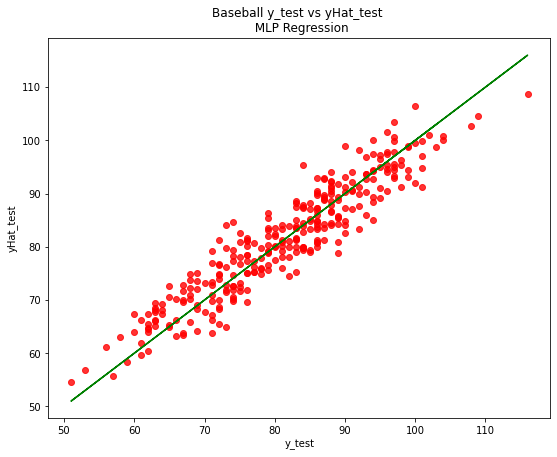

Correlation Coefficient: 
 [[1.         0.93504942]
 [0.93504942 1.        ]]


In [59]:
plt.figure(figsize = (9, 7))

plt.scatter(y_test, yHat_test10, color = "r", alpha = 0.8)

plt.plot(y_test, y_test, "-", color = "g")

plt.title("Baseball y_test vs yHat_test \n MLP Regression")
plt.xlabel("y_test")
plt.ylabel("yHat_test")
plt.show()

print("Correlation Coefficient: \n", np.corrcoef(y_test, yHat_test10))

y_test_Corr10 = np.corrcoef(y_test, yHat_test10)

In [61]:
MAE10 = round(metrics.mean_absolute_error(y_test, yHat_test10), 2)

MSE10 = round(metrics.mean_squared_error(y_test, yHat_test10), 2)

RMSE10 = round(np.sqrt(metrics.mean_squared_error(y_test, yHat_test10)), 2)

print("MAE10:", MAE10)
print()
print("MSE10:", MSE10)
print()
print("RMSE10:", RMSE10)

MAE10: 3.36

MSE10: 16.75

RMSE10: 4.09


## tabulation

In [62]:
df.columns

Index(['RS', 'RA', 'OBP', 'SLG', 'BA', 'League_NL', 'Playoffs', 'W'], dtype='object')

In [63]:
result1 = [y_test_Corr1[0][1]]
         
column1 = ["LR"]

subj = ['y_yHat_test_Corr']

Result1 = pd.DataFrame(result1, columns = column1)

Result1

,LR
0,0.94491


In [64]:
Result1.insert(loc = 0, column = "Results", value = subj)

Result1

,Results,LR
0,y_yHat_test_Corr,0.94491


In [65]:
result2 = [y_test_Corr2[0][1]] 
          
column2 = ["Lasso"]

Result2 = pd.DataFrame(result2, columns = column2)

Result2

,Lasso
0,0.944897


In [66]:
result3 = [y_test_Corr3[0][1]] 
          
column3 = ["Ridge"]

Result3 = pd.DataFrame(result3, columns = column3)

Result3

,Ridge
0,0.944949


In [67]:
result4 = [y_test_Corr4[0][1]] 
          
column4 = ["DT"]

Result4 = pd.DataFrame(result4, columns = column4)

Result4

,DT
0,0.88746


In [68]:
result5 = [y_test_Corr5[0][1]] 
          
column5 = ["RF"]

Result5 = pd.DataFrame(result5, columns = column5)

Result5

,RF
0,0.919187


In [69]:
result6 = [y_test_Corr6[0][1]] 
          
column6 = ["SVR"]

Result6 = pd.DataFrame(result6, columns = column6)

Result6

,SVR
0,0.945242


In [70]:
result7 = [y_test_Corr7[0][1]] 
          
column7 = ["MARS"]

Result7 = pd.DataFrame(result7, columns = column7)

Result7

,MARS
0,0.943977


In [71]:
result8 = [y_test_Corr8[0][1]] 
          
column8 = ["XGB"]

Result8 = pd.DataFrame(result8, columns = column8)

Result8

,XGB
0,0.920261


In [72]:
result9 = [y_test_Corr9[0][1]] 
          
column9 = ["EN"]

Result9 = pd.DataFrame(result9, columns = column9)

Result9

,EN
0,0.922341


In [75]:
result10 = [y_test_Corr10[0][1]] 
          
column10 = ["MLP"]

Result10 = pd.DataFrame(result10, columns = column10)

Result10

,MLP
0,0.935049


## merge DataFrames

In [76]:
LR_Outcome = pd.concat([Result1, Result2, Result3, Result4, Result5, Result6, Result7, 
                        Result8, Result9, Result10], axis = 1)

LR_Outcome

,Results,LR,Lasso,Ridge,DT,RF,SVR,MARS,XGB,EN,MLP
0,y_yHat_test_Corr,0.94491,0.944897,0.944949,0.88746,0.919187,0.945242,0.943977,0.920261,0.922341,0.935049


In [77]:
tab11 = [MAE1, MSE1, RMSE1] 
          
column11 = ["LR"]

subj = ["MAE", "MSE", "RMSE"]

Tab1 = pd.DataFrame(tab11, columns = column11)

Tab1.insert(loc = 0, column = "Results", value = subj)

Tab1

,Results,LR
0,MAE,3.11
1,MSE,14.29
2,RMSE,3.78


In [78]:
tab22 = [MAE2, MSE2, RMSE2] 
          
column22 = ["Lasso"]

Tab2 = pd.DataFrame(tab22, columns = column22)

Tab2

,Lasso
0,3.44
1,18.19
2,4.27


In [79]:
tab33 = [MAE3, MSE3, RMSE3] 
          
column33 = ["Ridge"]

Tab3 = pd.DataFrame(tab33, columns = column33)

Tab3

,Ridge
0,3.11
1,14.28
2,3.78


In [80]:
tab44 = [MAE4, MSE4, RMSE4] 
          
column44 = ["DT"]

Tab4 = pd.DataFrame(tab44, columns = column44)

Tab4

,DT
0,4.19
1,28.31
2,5.32


In [81]:
tab55 = [MAE5, MSE5, RMSE5] 
          
column55 = ["RF"]

Tab5 = pd.DataFrame(tab55, columns = column55)

Tab5

,RF
0,3.72
1,21.81
2,4.67


In [82]:
tab66 = [MAE6, MSE6, RMSE6] 
          
column66 = ["SVR"]

Tab6 = pd.DataFrame(tab66, columns = column66)

Tab6

,SVR
0,3.09
1,14.17
2,3.76


In [83]:
tab77 = [MAE7, MSE7, RMSE7] 
          
column77 = ["MARS"]

Tab7 = pd.DataFrame(tab77, columns = column77)

Tab7

,MARS
0,3.09
1,14.64
2,3.83


In [84]:
tab88 = [MAE8, MSE8, RMSE8] 
          
column88 = ["XGB"]

Tab8 = pd.DataFrame(tab88, columns = column88)

Tab8

,XGB
0,3.64
1,20.35
2,4.51


In [85]:
tab99 = [MAE9, MSE9, RMSE9] 
          
column99 = ["EN"]

Tab9 = pd.DataFrame(tab99, columns = column99)

Tab9

,EN
0,4.73
1,33.43
2,5.78


In [86]:
tab100 = [MAE10, MSE10, RMSE10] 
          
column100 = ["MLP"]

Tab10 = pd.DataFrame(tab100, columns = column100)

Tab10

,MLP
0,3.36
1,16.75
2,4.09


In [87]:
LR_Tableau = pd.concat([Tab1, Tab2, Tab3, Tab4, Tab5, Tab6, Tab7, Tab8, Tab9, Tab10], 
                       axis = 1)

LR_Tableau

,Results,LR,Lasso,Ridge,DT,RF,SVR,MARS,XGB,EN,MLP
0,MAE,3.11,3.44,3.11,4.19,3.72,3.09,3.09,3.64,4.73,3.36
1,MSE,14.29,18.19,14.28,28.31,21.81,14.17,14.64,20.35,33.43,16.75
2,RMSE,3.78,4.27,3.78,5.32,4.67,3.76,3.83,4.51,5.78,4.09


In [88]:
LR_Table = pd.concat([LR_Tableau, LR_Outcome])

LR_Table.reset_index(drop = True, inplace = True)

LR_Table

,Results,LR,Lasso,Ridge,DT,RF,SVR,MARS,XGB,EN,MLP
0,MAE,3.11000,3.440000,3.110000,4.19000,3.720000,3.090000,3.090000,3.640000,4.730000,3.360000
1,MSE,14.29000,18.190000,14.280000,28.31000,21.810000,14.170000,14.640000,20.350000,33.430000,16.750000
2,RMSE,3.78000,4.270000,3.780000,5.32000,4.670000,3.760000,3.830000,4.510000,5.780000,4.090000
3,y_yHat_test_Corr,0.94491,0.944897,0.944949,0.88746,0.919187,0.945242,0.943977,0.920261,0.922341,0.935049


## prediction for new data

In [89]:
Data = [[600, 650, 0.314, 0.349, 0.239, 1, 0], 
        [650, 800, 0.324, 0.359, 0.249, 0, 0], 
        [700, 750, 0.334, 0.369, 0.259, 1, 0],
        [750, 850, 0.344, 0.379, 0.269, 0, 0], 
        [800, 700, 0.354, 0.389, 0.279, 1, 0], 
        [850, 750, 0.364, 0.399, 0.289, 0, 1],
        [900, 700, 0.374, 0.409, 0.299, 1, 1], 
        [950, 750, 0.384, 0.419, 0.299, 0, 1], 
        [1050, 800, 0.394, 0.429, 0.319, 1, 1]]

column = ["RS", "RA", "OBP", "SLG", "BA", "League_NL", "Playoffs"]

new_Data1 = pd.DataFrame(Data, columns = column)

new_Data1

,RS,RA,OBP,SLG,BA,League_NL,Playoffs
0,600,650,0.314,0.349,0.239,1,0
1,650,800,0.324,0.359,0.249,0,0
2,700,750,0.334,0.369,0.259,1,0
3,750,850,0.344,0.379,0.269,0,0
4,800,700,0.354,0.389,0.279,1,0
5,850,750,0.364,0.399,0.289,0,1
6,900,700,0.374,0.409,0.299,1,1
7,950,750,0.384,0.419,0.299,0,1
8,1050,800,0.394,0.429,0.319,1,1


In [90]:
SS = StandardScaler()

new_Data_lr = SS.fit_transform(new_Data1)

prediction1 = lr_model.predict(new_Data_lr)

prediction1

array([82.35466901, 62.33490023, 73.3567501 , 61.0633432 , 87.53791683,
       85.21394907, 96.23579894, 91.72588372, 90.18891679])

In [91]:
new_Data = new_Data1.copy()

new_Data['LR'] = prediction1

new_Data

,RS,RA,OBP,SLG,BA,League_NL,Playoffs,LR
0,600,650,0.314,0.349,0.239,1,0,82.354669
1,650,800,0.324,0.359,0.249,0,0,62.334900
2,700,750,0.334,0.369,0.259,1,0,73.356750
3,750,850,0.344,0.379,0.269,0,0,61.063343
4,800,700,0.354,0.389,0.279,1,0,87.537917
5,850,750,0.364,0.399,0.289,0,1,85.213949
6,900,700,0.374,0.409,0.299,1,1,96.235799
7,950,750,0.384,0.419,0.299,0,1,91.725884
8,1050,800,0.394,0.429,0.319,1,1,90.188917


In [92]:
new_Data_lasso = SS.fit_transform(new_Data1)

prediction2 = lasso.predict(new_Data_lasso)

new_Data['Lasso'] = prediction2

new_Data

,RS,RA,OBP,SLG,BA,League_NL,Playoffs,LR,Lasso
0,600,650,0.314,0.349,0.239,1,0,82.354669,81.961940
1,650,800,0.324,0.359,0.249,0,0,62.334900,65.686714
2,700,750,0.334,0.369,0.259,1,0,73.356750,74.575610
3,750,850,0.344,0.379,0.269,0,0,61.063343,64.591414
4,800,700,0.354,0.389,0.279,1,0,87.537917,86.062372
5,850,750,0.364,0.399,0.289,0,1,85.213949,84.737254
6,900,700,0.374,0.409,0.299,1,1,96.235799,93.626151
7,950,750,0.384,0.419,0.299,0,1,91.725884,89.932986
8,1050,800,0.394,0.429,0.319,1,1,90.188917,88.837686


In [93]:
new_Data_ridge = SS.fit_transform(new_Data1)

prediction3 = ridge.predict(new_Data_ridge)

new_Data['Ridge'] = prediction3

new_Data

,RS,RA,OBP,SLG,BA,League_NL,Playoffs,LR,Lasso,Ridge
0,600,650,0.314,0.349,0.239,1,0,82.354669,81.961940,82.323518
1,650,800,0.324,0.359,0.249,0,0,62.334900,65.686714,62.348339
2,700,750,0.334,0.369,0.259,1,0,73.356750,74.575610,73.350432
3,750,850,0.344,0.379,0.269,0,0,61.063343,64.591414,61.088568
4,800,700,0.354,0.389,0.279,1,0,87.537917,86.062372,87.517290
5,850,750,0.364,0.399,0.289,0,1,85.213949,84.737254,85.233509
6,900,700,0.374,0.409,0.299,1,1,96.235799,93.626151,96.235602
7,950,750,0.384,0.419,0.299,0,1,91.725884,89.932986,91.743936
8,1050,800,0.394,0.429,0.319,1,1,90.188917,88.837686,90.170932


In [94]:
new_Data_dt = SS.fit_transform(new_Data1)

prediction4 = dt.predict(new_Data_dt)

new_Data['DT'] = prediction4

new_Data

,RS,RA,OBP,SLG,BA,League_NL,Playoffs,LR,Lasso,Ridge,DT
0,600,650,0.314,0.349,0.239,1,0,82.354669,81.961940,82.323518,80.054545
1,650,800,0.324,0.359,0.249,0,0,62.334900,65.686714,62.348339,55.277778
2,700,750,0.334,0.369,0.259,1,0,73.356750,74.575610,73.350432,77.607143
3,750,850,0.344,0.379,0.269,0,0,61.063343,64.591414,61.088568,62.583333
4,800,700,0.354,0.389,0.279,1,0,87.537917,86.062372,87.517290,87.357798
5,850,750,0.364,0.399,0.289,0,1,85.213949,84.737254,85.233509,89.363636
6,900,700,0.374,0.409,0.299,1,1,96.235799,93.626151,96.235602,97.047619
7,950,750,0.384,0.419,0.299,0,1,91.725884,89.932986,91.743936,94.659574
8,1050,800,0.394,0.429,0.319,1,1,90.188917,88.837686,90.170932,91.318182


In [95]:
new_Data_rf = SS.fit_transform(new_Data1)

prediction5 = rf.predict(new_Data_rf)

new_Data['RF'] = prediction5

new_Data

,RS,RA,OBP,SLG,BA,League_NL,Playoffs,LR,Lasso,Ridge,DT,RF
0,600,650,0.314,0.349,0.239,1,0,82.354669,81.961940,82.323518,80.054545,80.699016
1,650,800,0.324,0.359,0.249,0,0,62.334900,65.686714,62.348339,55.277778,58.382177
2,700,750,0.334,0.369,0.259,1,0,73.356750,74.575610,73.350432,77.607143,77.835614
3,750,850,0.344,0.379,0.269,0,0,61.063343,64.591414,61.088568,62.583333,65.641366
4,800,700,0.354,0.389,0.279,1,0,87.537917,86.062372,87.517290,87.357798,88.575446
5,850,750,0.364,0.399,0.289,0,1,85.213949,84.737254,85.233509,89.363636,90.702778
6,900,700,0.374,0.409,0.299,1,1,96.235799,93.626151,96.235602,97.047619,97.001111
7,950,750,0.384,0.419,0.299,0,1,91.725884,89.932986,91.743936,94.659574,93.674086
8,1050,800,0.394,0.429,0.319,1,1,90.188917,88.837686,90.170932,91.318182,92.576500


In [96]:
new_Data_svr = SS.fit_transform(new_Data1)

prediction6 = rf.predict(new_Data_svr)

new_Data['SVR'] = prediction6

new_Data

,RS,RA,OBP,SLG,BA,League_NL,Playoffs,LR,Lasso,Ridge,DT,RF,SVR
0,600,650,0.314,0.349,0.239,1,0,82.354669,81.961940,82.323518,80.054545,80.699016,80.699016
1,650,800,0.324,0.359,0.249,0,0,62.334900,65.686714,62.348339,55.277778,58.382177,58.382177
2,700,750,0.334,0.369,0.259,1,0,73.356750,74.575610,73.350432,77.607143,77.835614,77.835614
3,750,850,0.344,0.379,0.269,0,0,61.063343,64.591414,61.088568,62.583333,65.641366,65.641366
4,800,700,0.354,0.389,0.279,1,0,87.537917,86.062372,87.517290,87.357798,88.575446,88.575446
5,850,750,0.364,0.399,0.289,0,1,85.213949,84.737254,85.233509,89.363636,90.702778,90.702778
6,900,700,0.374,0.409,0.299,1,1,96.235799,93.626151,96.235602,97.047619,97.001111,97.001111
7,950,750,0.384,0.419,0.299,0,1,91.725884,89.932986,91.743936,94.659574,93.674086,93.674086
8,1050,800,0.394,0.429,0.319,1,1,90.188917,88.837686,90.170932,91.318182,92.576500,92.576500


In [97]:
new_Data_ear = SS.fit_transform(new_Data1)

prediction7 = ear.predict(new_Data_ear)

new_Data['MARS'] = prediction7

new_Data

,RS,RA,OBP,SLG,BA,League_NL,Playoffs,LR,Lasso,Ridge,DT,RF,SVR,MARS
0,600,650,0.314,0.349,0.239,1,0,82.354669,81.961940,82.323518,80.054545,80.699016,80.699016,82.283959
1,650,800,0.324,0.359,0.249,0,0,62.334900,65.686714,62.348339,55.277778,58.382177,58.382177,62.355934
2,700,750,0.334,0.369,0.259,1,0,73.356750,74.575610,73.350432,77.607143,77.835614,77.835614,73.292110
3,750,850,0.344,0.379,0.269,0,0,61.063343,64.591414,61.088568,62.583333,65.641366,65.641366,61.080135
4,800,700,0.354,0.389,0.279,1,0,87.537917,86.062372,87.517290,87.357798,88.575446,88.575446,87.448411
5,850,750,0.364,0.399,0.289,0,1,85.213949,84.737254,85.233509,89.363636,90.702778,90.702778,85.324913
6,900,700,0.374,0.409,0.299,1,1,96.235799,93.626151,96.235602,97.047619,97.001111,97.001111,96.261089
7,950,750,0.384,0.419,0.299,0,1,91.725884,89.932986,91.743936,94.659574,93.674086,93.674086,91.765164
8,1050,800,0.394,0.429,0.319,1,1,90.188917,88.837686,90.170932,91.318182,92.576500,92.576500,90.489365


In [98]:
new_Data_xgb = SS.fit_transform(new_Data1)

prediction8 = xgb.predict(new_Data_xgb)

new_Data['XGB'] = prediction8

new_Data

,RS,RA,OBP,SLG,BA,League_NL,Playoffs,LR,Lasso,Ridge,DT,RF,SVR,MARS,XGB
0,600,650,0.314,0.349,0.239,1,0,82.354669,81.961940,82.323518,80.054545,80.699016,80.699016,82.283959,84.061394
1,650,800,0.324,0.359,0.249,0,0,62.334900,65.686714,62.348339,55.277778,58.382177,58.382177,62.355934,57.571354
2,700,750,0.334,0.369,0.259,1,0,73.356750,74.575610,73.350432,77.607143,77.835614,77.835614,73.292110,72.540504
3,750,850,0.344,0.379,0.269,0,0,61.063343,64.591414,61.088568,62.583333,65.641366,65.641366,61.080135,62.346550
4,800,700,0.354,0.389,0.279,1,0,87.537917,86.062372,87.517290,87.357798,88.575446,88.575446,87.448411,88.748604
5,850,750,0.364,0.399,0.289,0,1,85.213949,84.737254,85.233509,89.363636,90.702778,90.702778,85.324913,89.391624
6,900,700,0.374,0.409,0.299,1,1,96.235799,93.626151,96.235602,97.047619,97.001111,97.001111,96.261089,96.841690
7,950,750,0.384,0.419,0.299,0,1,91.725884,89.932986,91.743936,94.659574,93.674086,93.674086,91.765164,94.409409
8,1050,800,0.394,0.429,0.319,1,1,90.188917,88.837686,90.170932,91.318182,92.576500,92.576500,90.489365,90.240486


In [99]:
new_Data_en = SS.fit_transform(new_Data1)

prediction9 = en.predict(new_Data_en)

new_Data['EN'] = prediction9

new_Data

,RS,RA,OBP,SLG,BA,League_NL,Playoffs,LR,Lasso,Ridge,DT,RF,SVR,MARS,XGB,EN
0,600,650,0.314,0.349,0.239,1,0,82.354669,81.961940,82.323518,80.054545,80.699016,80.699016,82.283959,84.061394,78.666018
1,650,800,0.324,0.359,0.249,0,0,62.334900,65.686714,62.348339,55.277778,58.382177,58.382177,62.355934,57.571354,68.868091
2,700,750,0.334,0.369,0.259,1,0,73.356750,74.575610,73.350432,77.607143,77.835614,77.835614,73.292110,72.540504,74.946852
3,750,850,0.344,0.379,0.269,0,0,61.063343,64.591414,61.088568,62.583333,65.641366,65.641366,61.080135,62.346550,69.118097
4,800,700,0.354,0.389,0.279,1,0,87.537917,86.062372,87.517290,87.357798,88.575446,88.575446,87.448411,88.748604,83.135203
5,850,750,0.364,0.399,0.289,0,1,85.213949,84.737254,85.233509,89.363636,90.702778,90.702778,85.324913,89.391624,85.524363
6,900,700,0.374,0.409,0.299,1,1,96.235799,93.626151,96.235602,97.047619,97.001111,97.001111,96.261089,96.841690,91.603124
7,950,750,0.384,0.419,0.299,0,1,91.725884,89.932986,91.743936,94.659574,93.674086,93.674086,91.765164,94.409409,89.452974
8,1050,800,0.394,0.429,0.319,1,1,90.188917,88.837686,90.170932,91.318182,92.576500,92.576500,90.489365,90.240486,88.697405


In [100]:
new_Data_mlp = SS.fit_transform(new_Data1)

prediction10 = mlp.predict(new_Data_mlp)

new_Data['MLP'] = prediction10

new_Data

,RS,RA,OBP,SLG,BA,League_NL,Playoffs,LR,Lasso,Ridge,DT,RF,SVR,MARS,XGB,EN,MLP
0,600,650,0.314,0.349,0.239,1,0,82.354669,81.961940,82.323518,80.054545,80.699016,80.699016,82.283959,84.061394,78.666018,80.654555
1,650,800,0.324,0.359,0.249,0,0,62.334900,65.686714,62.348339,55.277778,58.382177,58.382177,62.355934,57.571354,68.868091,61.866175
2,700,750,0.334,0.369,0.259,1,0,73.356750,74.575610,73.350432,77.607143,77.835614,77.835614,73.292110,72.540504,74.946852,72.554992
3,750,850,0.344,0.379,0.269,0,0,61.063343,64.591414,61.088568,62.583333,65.641366,65.641366,61.080135,62.346550,69.118097,62.334717
4,800,700,0.354,0.389,0.279,1,0,87.537917,86.062372,87.517290,87.357798,88.575446,88.575446,87.448411,88.748604,83.135203,88.564766
5,850,750,0.364,0.399,0.289,0,1,85.213949,84.737254,85.233509,89.363636,90.702778,90.702778,85.324913,89.391624,85.524363,86.364666
6,900,700,0.374,0.409,0.299,1,1,96.235799,93.626151,96.235602,97.047619,97.001111,97.001111,96.261089,96.841690,91.603124,88.632891
7,950,750,0.384,0.419,0.299,0,1,91.725884,89.932986,91.743936,94.659574,93.674086,93.674086,91.765164,94.409409,89.452974,91.485209
8,1050,800,0.394,0.429,0.319,1,1,90.188917,88.837686,90.170932,91.318182,92.576500,92.576500,90.489365,90.240486,88.697405,87.468836
